In [14]:
import numpy as np
import pandas as pd
import glob
import os
from os import listdir
from os.path import isfile, join
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
from PIL import Image

from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

#Looped Feature Extraction

In [51]:
path = []
directories = ['/home/rachaelrho/ds/metis/mcnulty/imagesSpag/',
               '/home/rachaelrho/ds/metis/mcnulty/imagesZucch/']

for directory in directories:
    os.chdir(directory)
    for file in glob.glob("*.jpg"):
        path.append([directory + file, directories.index(directory)])

In [77]:
img_paths = [x[0] for x in path] 

img_descs = []
img_colors= []

for img_path in img_paths:
    ##COLOR
    img = cv2.imread(img_path)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img1 = img1.reshape((img1.shape[0] * img1.shape[1], 3))
    k_means = KMeans(n_clusters = 5)
    k_means.fit(img1)
    colors = k_means.cluster_centers_.astype("uint8")
    img_colors.append(colors)
    
    ##SIFT
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, desc = sift.detectAndCompute(gray, None)
    img_descs.append(desc)

img_colors2 = [x.sum(axis=0) for x in np.array(img_colors)]   
    
img_descs2 = [desc for desc_list in img_descs for desc in desc_list] 
img_desc2 = np.array(img_descs2)
k_means.fit(img_desc2)
k_means = KMeans(n_clusters=5) 
n_clusters = k_means.n_cluster
img_clustered_words = [k_means.predict(raw_words) for raw_words in img_descs] 
img_bow_hist = np.array([np.bincount(clustered_words, minlength=n_clusters) for clustered_words in img_clustered_words])

X = np.concatenate((img_colors2, img_bow_hist), axis=1)
y = [x[1] for x in path] 

data = zip(X,y)
file_name = "pinData1"
fileObject = open("/home/rachaelrho/ds/metis/mcnulty/pinData1",'wb')
pickle.dump(data, fileObject)
fileObject.close()

In [2]:
fileObject = open('pinData','r')
pinData = pickle.load(fileObject)

In [3]:
X,y = zip(*pinData)

# Train and Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#Model Fit / Grid Search

### Gridsearch SVM and Random Forest

In [16]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,1e-1,1e-2,1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, n_jobs=-1, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
()
Grid scores on development set:
()
0.603 (+/-0.245) for {'kernel': 'rbf', 'C': 1, 'gamma': 1}
1.000 (+/-0.000) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.639 (+/-0.090) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.595 (+/-0.007) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.784 (+/-0.022) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.603 (+/-0.245) for {'kernel': 'rbf', 'C': 10, 'gamma': 1}
1.000 (+/-0.000) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.640 (+/-0.090) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.617 (+/-0.004) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.792 (+/-0.020) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.603 (+/-0.245) for {'kerne

In [19]:
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10]}]
 
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, n_jobs=-1, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
()
Grid scores on development set:
()
0.798 (+/-0.022) for {'kernel': 'linear', 'C': 1}
0.798 (+/-0.022) for {'kernel': 'linear', 'C': 10}
()
Detailed classification report:
()
The model is trained on the full development set.
The scores are computed on the full evaluation set.
()
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       143
          1       0.81      0.70      0.75       125

avg / total       0.79      0.78      0.78       268

()
# Tuning hyper-parameters for recall
()
Best parameters set found on development set:
()
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=

In [12]:
tuned_parameters = {"max_depth": [3, None],
              "max_features": [1,3,5,8],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(n_estimators=20), param_grid=tuned_parameters)
    clf.fit(X_train, y_train)
        
    print str(clf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
                % (mean_score, scores.std() / 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision
()
GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'min_samples_leaf': [1, 3, 10], 'min_samples_split': [1, 3, 10], 'criterion': ['gini', 'entropy'], 'max_features': [1, 3, 5, 8], 'max_depth': [3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
Best parameters set found on development set:
()
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_samples_leaf=1, min_

# Final Model

In [10]:
clf = SVC(C=100, gamma=0.0001, kernel='rbf')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
clf.score(X_test, y_test)

0.84328358208955223

In [64]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.87      0.86       143
          1       0.84      0.82      0.83       125

avg / total       0.84      0.84      0.84       268



In [62]:
#ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)

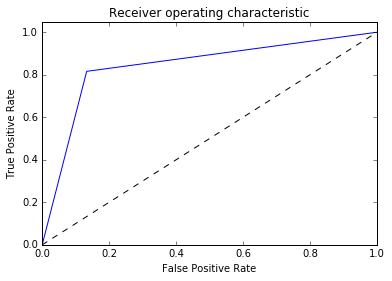

In [63]:
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()